In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn # 其它库之前我们都介绍过了。这个新库是用于数据挖掘，数据分析和机器学习的库，例如它里面就内置了很多人工智能函数
import sklearn.datasets
import sklearn.linear_model

# 下面两个库是我们自定义的，第一个提供一些工具函数，第二个提供一些单元测试工具函数。
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets 
from testCases import * 

%matplotlib inline

np.random.seed(1)   # 设置一个随机数种子，来保证后面我的代码产生的随机数与你们电脑上产生的一样,这样我的结果才能和你们运行的结果一样

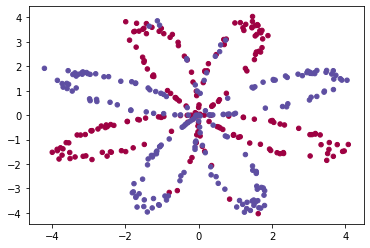

In [7]:
# 这个数据集由400个样本组成。这400个样本是400个颜色点。输入特征X是点的横纵坐标，标签Y是点的颜色标签（0表示红色，1表示蓝色）
# 下面的图片展示了这400个颜色点。
# 我们的目标就是通过训练一个神经网络来通过坐标值判断在下图坐标系中某一点可能的颜色，
# 例如坐标（-4，2）的点可能是什么颜色，（-4，3）最可能是什么颜色。将红色和蓝色的点区分出来。

# 下面这个函数就是构造了400个点（横着坐标）和它们对应的标签，把它们赋值到了X和Y变量中。
# 并且在构造这400点的坐标时用了一些算法以使它们形成了一个花的形状。
X, Y = load_planar_dataset()

# 下面用scatter来将数据集中的400个点画出来。
# X[0, :]表示400点的横坐标，X[1, :]表示纵坐标，X.shape = (1,400) c=Y.ravel()是指定400个点的颜色，s=40指定点的大小，
# cmap指定调色板，如果用不同的调色板，那么Y的值对应的颜色也会不同。用plt.cm.Spectral这个调色板时，Y等于0指代红色，1指代蓝色。
# 你可能会有疑问，为什么不直接用c=Y,而用c=Y.ravel()，它们只是维度表示方式不同，
# Y的维度是(1,400),Y.ravel()的维度是(400,)，scatter这个库函数需要后面的形式。
plt.scatter(X[0, :], X[1, :],c=Y.ravel(), s=20, cmap=plt.cm.Spectral)

In [10]:
shape_X = X.shape # 得出X的维度,维度是(2,400)，表示（横、纵坐标，样本数）
shape_Y = Y.shape # 得出Y的维度,维度是(1,400)，表示（颜色标签，样本数）
m = Y.shape[1]  # 得出样本数量

print ('X的维度是: ' + str(shape_X))
print ('Y的维度: ' + str(shape_Y))
print ('训练样本的个数是：' + str(m))

X的维度是: (2, 400)
Y的维度: (1, 400)
训练样本的个数是：400


在构建浅层神经网络前，我们先快速地构建一个单神经元网络，先用它来执行上面的分类识别任务，然后再用浅层神经网络来进行同样的任务，这样就可以明显的对比出上一节我们学的单神经元网络是多么的弱。

In [13]:
# 生成LogisticRegressionCV类的一个对象，LogisticRegressionCV类内部实现了一个单神经元网络
clf = sklearn.linear_model.LogisticRegressionCV()

# 将数据集传入对象中进行训练。像学习率和训练次数等超参数都有默认值，所以我们只需要简单地传入数据集就可以了。
# 这个方法会根据数据集进行训练，并将训练好的w和b参数保存在对象clf中，后面就可以用这些参数进行预测。
clf.fit(X.T, Y.T.ravel())

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

预测准确度是: 47 % 
预测准确度是: 47 % 


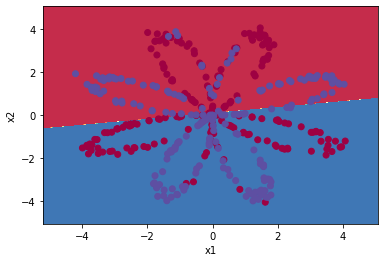

In [20]:
# 用clf对象来对数据集进行预测。我们为了简便起见，只用了训练数据集，其实应该用测试数据集的。
# 返回的结果LR_predictions中包含的是400个0或1，表示对400个点颜色的预测结果。
LR_predictions = clf.predict(X.T)

# 打印出预测准确度。下面是用了自定义的一个算法来求准确度，其实也可以简单地用clf的方法来求——clf.score(X.T,Y.T.ravel())
print ('预测准确度是: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) + '% ')  # np.dot(Y, LR_predictions)预测是1且正确， np.dot(1 - Y,1 - LR_predictions))预测是0且正确
print('预测准确度是: %d ' % float(clf.score(X.T, Y.T.ravel())*100) + '% ')

# 画出预测结果图。
# 可以看到，这个单神经元网络只是简单地认为在坐标上面部分的点大致就是红色的，位于坐标下半部分的就是蓝色。
# 在这个函数里面，会将整个坐标的点（不仅仅是待预测花形点集X）传入到clf.predict中，来得出坐标中每一个点的颜色预测值，然后根据它们画出底图（就是坐标上半部是红色下半部是蓝色的图）。最后，再将待预测点集X画到底图上。通过底图和待预测点集的重叠，就可以很直观地看出神经网络预测的精准度。
# 例如，本例中预测得就很不准确，单神经元网络只是简单地认为坐标上部的点是红色，但实际上上面还有很多蓝色点，而且下面也有很多红色点。
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())

多神经元开始！

1. 先将浅层神经网络需要的各个部件各个工具函数编写好，
2. 然后再将这些函数组合起来形成一个完整的神经网络模型，
3. 然后用这个模型来训练参数，
4. 最后用训练好的参数来进行预测。

![](./images/structure.png)

In [26]:
# 这个在单神经元实战时也有，但是那时是全都初始化为0，在多神经网络中是万万不可全初始化为0的。

def initialize_parameters(n_x, n_h, n_y):
    """
    参数:
    n_x -- 输入层的神经元个数
    n_h -- 隐藏层的神经元个数
    n_y -- 输出层的神经元个数
    """
    
    np.random.seed(2)
    
    # 随机初始化隐藏层相关的参数w.
    # 每一个隐藏层神经元都与输入层的每一个神经元相连。每一个相连都会有一个对应的参数w。
    W1 = np.random.randn(n_h, n_x) * 0.01  # (隐藏层的神经元个数，输入层的神经元个数)
    W2 = np.random.randn(n_y, n_h) * 0.01  # (输出层的神经元个数，前一层的神经元个数)
    # 乘0.01是因为要把w变得小, w小z也会小, z小sigmoid的斜率大, 学习的速度也就快
    
    # 将参数b赋值为0，因为w已经非0了，所以b可以为0
    b1 = np.zeros(shape=(n_h, 1))  #（隐藏层的神经元个数，1）
    b2 = np.zeros(shape=(n_y, 1))  # (输出层的神经元个数，1)
    
    parameters = {
        "W1": W1,  # (4, 2)
        "b1": b1,  # (4, 1)
        "W2": W2,  # (1, 4)
        "b2": b2,  # (1, 1)
    }
    
    return parameters

In [94]:
# 前向传播
def forward_propagation(X, parameters):
    """
    参数:
    X -- 输入特征，维度是 (横纵坐标, 样本数)
    parameters -- 参数w和b
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # 从字典中取出参数
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # 前向传播算法
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)  # 第一层的激活函数我们使用tanh。numpy库里面已经帮我们实现了tanh工具函数
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)  # 第二层我们使用sigmoid，因为这个问题属于二分问题。在planar_utils里面实现的
    
    cache = {
        "Z1": Z1,  # (4, 400) (第一层4个神经元所以每个样本有4个值，共400个样本)
        "A1": A1,  # (4, 400)  
        "Z2": Z2,  # (1, 400) (输出层只有一个神经元，)
        "A2": A2,  # (1, 400)
    }
    
    return A2, cache

In [88]:
def compute_cost(A2, Y):
    """
    参数:
    A2 -- 神经网络最后一层的输出结果
    Y -- 数据的颜色标签
    """
    m = Y.shape[1]
    
    logprobs = - (np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2)))
    cost = np.sum(logprobs) / m

    return cost

In [89]:
# 反向传播
def backward_propagation(parameters, cache, X, Y):
    """
    参数:
    parameters -- 参数w和b
    cache -- 前向传播时保存起来的一些数据
    X -- 输入特征
    Y -- 标签
    """
    m = X.shape[1] # 获取样本数

    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    # 计算梯度（ 偏导数）
    dZ2 = A2 - Y  # (1, 400)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)  # (1,400)*(400,4) = (1,4)个参数，4个w的偏导
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)  # (1, 1) d的偏导
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))  # (4,1)*(1,400)=(4,400)4个神经元 tanh的偏导是1-a^2 
    dW1 = (1 / m) * np.dot(dZ1, X.T)  # (4, 400)*(400,4) = (4,4)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)  # (4,1)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [90]:
# 用上面得到的梯度来进行梯度下降（更新参数w和b，使其更优化）
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    参数:
    parameters -- 参数w和b 
    grads -- 梯度
    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # 根据梯度和学习率来更新参数，使其更优
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [91]:
# 上面已经将各个所需的功能函数都编写好了。现在我们将它们组合在一个大函数中来构建出一个训练模型。
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False, learning_rate=1.2):
    """
    Arguments:
    X -- 输入特征
    Y -- 标签
    n_h -- 隐藏层的神经元个数
    num_iterations -- 训练多少次
    print_cost -- 是否打印出成本
    """
    np.random.seed(2)
    
    n_x = X.shape[0] # 根据输入特征的维度得出输入层的神经元个数
    n_y = Y.shape[0] # 根据标签的维度得出输出层的神经元个数
    
    parameters = initialize_parameters(n_x, n_h, n_y)  # 初始化神经网络
    
    # 在这个循环里进行训练，一次一次地对参数进行优化
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)  # 获得预测值
    
        cost = compute_cost(A2, Y)
    
        grads = backward_propagation(parameters, cache, X, Y)  # 进行反向传播。根据前向传播得到的一些值算出梯度。
        
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)  # 根据梯度对参数进行一次优化（下降）
        
        if print_cost and i % 1000 == 0:
            print ("在训练%i次后，成本是: %f" % (i, cost))
            
    return parameters

In [92]:
# 我们已经可以通过上面的函数来进行参数训练。
# 这个函数可以利用上面学习到的参数来对新数据进行预测
def predict(parameters, X):
    """    
    参数:
    parameters -- 训练得出的参数（学习到的参数）
    X -- 预测数据
    """
    
    A2, _ = forward_propagation(X, parameters)
    predictions = np.round(A2) # 对结果进行四舍五入，小于0.5就是0，否则就是1
    
    return predictions

在训练0次后，成本是: 0.693048
在训练1000次后，成本是: 0.288083
在训练2000次后，成本是: 0.254385
在训练3000次后，成本是: 0.233864
在训练4000次后，成本是: 0.226792
在训练5000次后，成本是: 0.222644
在训练6000次后，成本是: 0.219731
在训练7000次后，成本是: 0.217504
在训练8000次后，成本是: 0.219440
在训练9000次后，成本是: 0.218553
预测准确率是: 90%


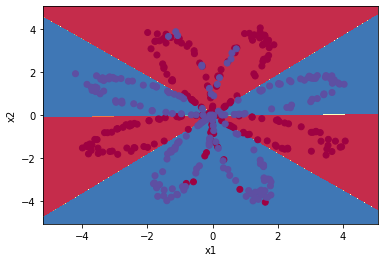

In [95]:
# 好，所有函数都实现完毕了，我们已经构建好了一个浅层神经网络了。
# 现在用这个浅层神经网络来执行与文章开头的单神经元网络同样的任务——将花形图案中的红蓝点区分开

# 首先是根据训练数据来进行参数学习（训练数据是与单神经元网络一样一样的）
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

# 然后用训练得出的参数进行预测。
predictions = predict(parameters, X)
print ('预测准确率是: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

# 将预测结果画出来。
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())

1个隐藏层神经元时的准确度是: 67.5 %
2个隐藏层神经元时的准确度是: 67.25 %
3个隐藏层神经元时的准确度是: 90.75 %
4个隐藏层神经元时的准确度是: 90.5 %
5个隐藏层神经元时的准确度是: 91.25 %
20个隐藏层神经元时的准确度是: 90.5 %
50个隐藏层神经元时的准确度是: 90.25 %


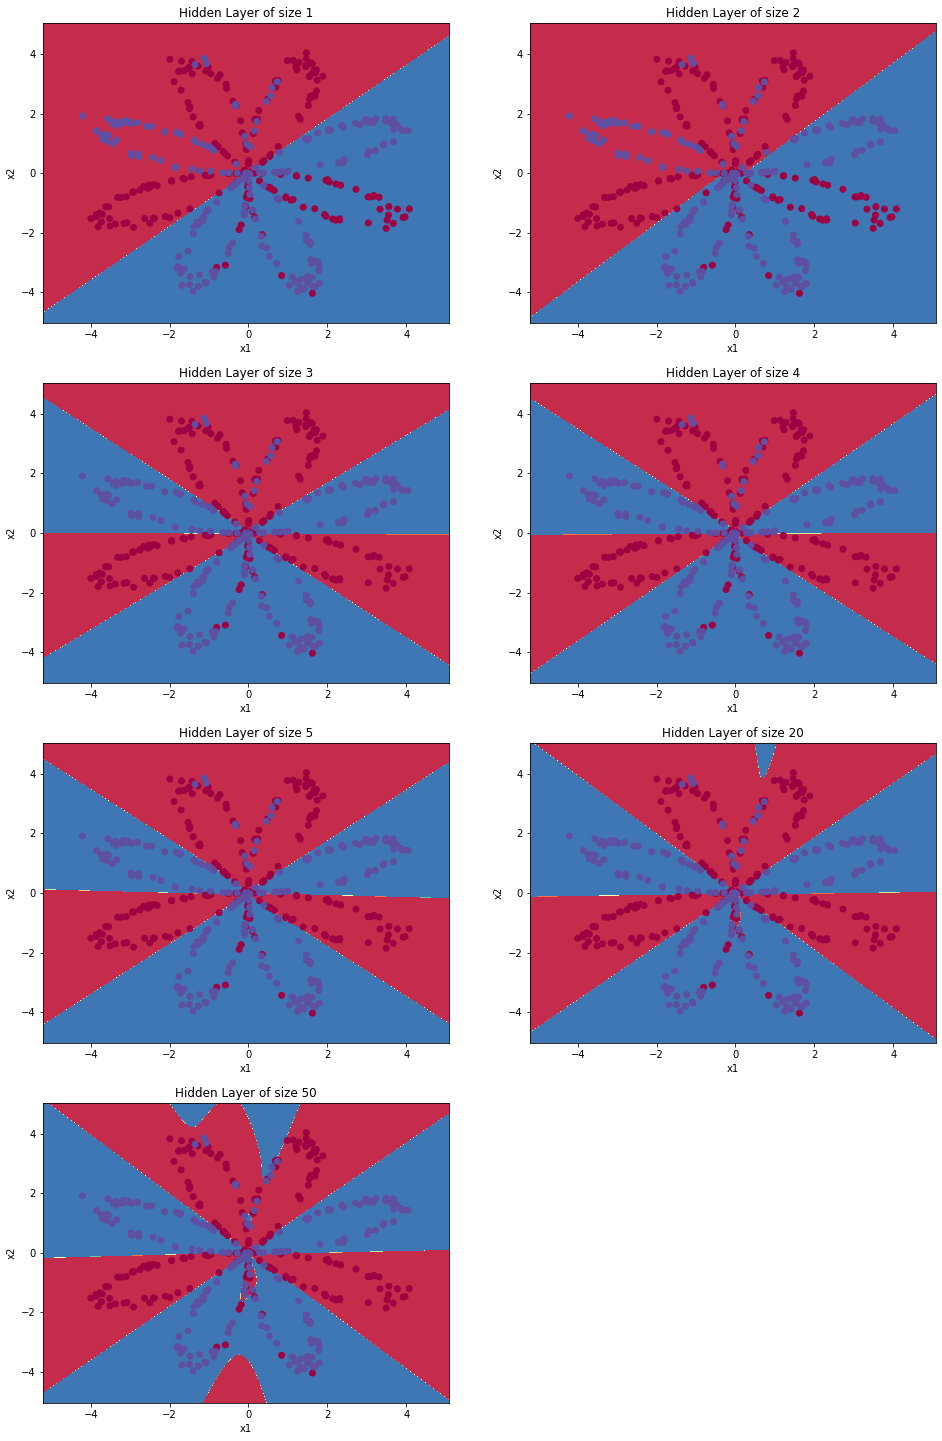

In [96]:
# 展示不同神经元个数的不同准确度。这段代码可以要运行几分钟。

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50] # 不同的神经元个数
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("{}个隐藏层神经元时的准确度是: {} %".format(n_h, accuracy))